In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_columns', 500)

%matplotlib notebook

data_path = os.getcwd()[:-len('Notebooks')] + 'Data/Covid/'
os.listdir(data_path)

['time_series_covid19_confirmed_global.csv',
 '.DS_Store',
 '200427COVID19MEXICO1.csv',
 '200417COVID19MEXICO.csv',
 '200427COVID19MEXICO.numbers',
 '200427COVID19MEXICO.csv',
 'time_series_covid19_recovered_global.csv',
 '200428COVID19MEXICO.csv',
 'time_series_covid19_deaths_global.csv']

In [2]:
confirmed = pd.read_csv(data_path + 'time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv(data_path + 'time_series_covid19_deaths_global.csv')
recovered = pd.read_csv(data_path + 'time_series_covid19_recovered_global.csv')

In [3]:
data = pd.read_csv(data_path + '200428COVID19MEXICO.csv', encoding = 'ISO-8859–1')
#datau = pd.read_csv(data_path + '200428COVID19MEXICO.csv')

In [4]:
data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [5]:
confirmed.head(1)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906


In [6]:
mexico = confirmed[confirmed['Country/Region'] == 'Mexico'][list(confirmed.columns)[5::]]
china = confirmed[confirmed['Country/Region'] == 'China'][list(confirmed.columns)[5::]]
italy = confirmed[confirmed['Country/Region'] == 'Italy'][list(confirmed.columns)[5::]]
eua = confirmed[confirmed['Country/Region'] == 'US'][list(confirmed.columns)[5::]]

In [7]:
eua

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
225,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,68,74,98,118,149,217,262,402,518,583,959,1281,1663,2179,2727,3499,4632,6421,7783,13747,19273,25600,33276,43843,53736,65778,83836,101657,121465,140909,161831,188172,213372,243762,275586,308853,337072,366667,396223,429052,461437,496535,526396,555313,580619,607670,636350,667801,699706


In [8]:
china = china.sum()

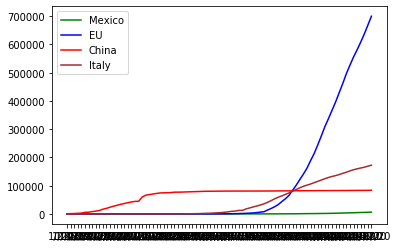

In [9]:
plt.plot(mexico.columns, mexico.T, color = 'g', label = 'Mexico')
plt.plot(eua.columns, eua.T, color = 'b', label = 'EU')
plt.plot(mexico.columns, china, color = 'r', label = 'China')
plt.plot(italy.columns, italy.T, color = 'brown', label = 'Italy')
plt.legend()

# Ingeniería de variables

In [10]:
data.head(2)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-28,034588,2,12,27,1,27,27,4,1,2020-04-27,2020-04-24,9999-99-99,97,2,32,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,99,MÃ©xico,99,97
1,2020-04-28,1da659,2,12,11,2,11,11,20,1,2020-04-07,2020-04-04,9999-99-99,97,2,27,1,97,2,2,2,2,2,2,2,2,2,2,2,99,2,99,MÃ©xico,99,97


In [11]:
data.shape

(77005, 35)

In [12]:
data['fecha_síntomas'] = pd.to_datetime(data['FECHA_SINTOMAS'])
data['fecha_ingreso'] = pd.to_datetime(data['FECHA_INGRESO'])
data['fecha_actualización'] = pd.to_datetime(data['FECHA_ACTUALIZACION'])
#data['fecha_def'] = pd.to_datetime(data['FECHA_DEF'])

In [13]:
import datetime

In [14]:
datetime.datetime.now()

datetime.datetime(2020, 5, 7, 22, 31, 56, 574454)

In [15]:
deads = []
dead = []
for d in data['FECHA_DEF']:
    if d == '9999-99-99': 
        deads.append(data['fecha_actualización'][0])
        dead.append(0)
    else: 
        deads.append(d)
        dead.append(1)

data['dead?'] = dead
data['fecha_def'] = pd.to_datetime(pd.Series(deads))

In [16]:
data.head(2)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,fecha_síntomas,fecha_ingreso,fecha_actualización,dead?,fecha_def
0,2020-04-28,034588,2,12,27,1,27,27,4,1,2020-04-27,2020-04-24,9999-99-99,97,2,32,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,99,MÃ©xico,99,97,2020-04-24,2020-04-27,2020-04-28,0,2020-04-28
1,2020-04-28,1da659,2,12,11,2,11,11,20,1,2020-04-07,2020-04-04,9999-99-99,97,2,27,1,97,2,2,2,2,2,2,2,2,2,2,2,99,2,99,MÃ©xico,99,97,2020-04-04,2020-04-07,2020-04-28,0,2020-04-28


In [17]:
data['días_con_síntomas'] = data['fecha_actualización'] - data['fecha_síntomas']
data['días_desde_ingreso'] = data['fecha_actualización'] - data['fecha_ingreso']
data['días_síntomas_hasta_def'] = data['fecha_def'] - data['fecha_síntomas']
data['días_ingreso_hasta_def'] = data['fecha_def'] - data['fecha_ingreso']

In [18]:
data['días_con_síntomas'] = data['días_con_síntomas'].apply(lambda x:x.days)
data['días_desde_ingreso'] = data['días_desde_ingreso'].apply(lambda x:x.days)
data['días_síntomas_hasta_def'] = data['días_síntomas_hasta_def'].apply(lambda x:x.days)
data['días_ingreso_hasta_def'] = data['días_ingreso_hasta_def'].apply(lambda x:x.days)

In [19]:
data.head(2)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,fecha_síntomas,fecha_ingreso,fecha_actualización,dead?,fecha_def,días_con_síntomas,días_desde_ingreso,días_síntomas_hasta_def,días_ingreso_hasta_def
0,2020-04-28,034588,2,12,27,1,27,27,4,1,2020-04-27,2020-04-24,9999-99-99,97,2,32,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,99,MÃ©xico,99,97,2020-04-24,2020-04-27,2020-04-28,0,2020-04-28,4,1,4,1
1,2020-04-28,1da659,2,12,11,2,11,11,20,1,2020-04-07,2020-04-04,9999-99-99,97,2,27,1,97,2,2,2,2,2,2,2,2,2,2,2,99,2,99,MÃ©xico,99,97,2020-04-04,2020-04-07,2020-04-28,0,2020-04-28,24,21,24,21


In [20]:
var_f = ['fecha_síntomas', 'fecha_ingreso', 'fecha_actualización', 'fecha_def',
        'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'FECHA_ACTUALIZACION']

var_c = ['EDAD', 'días_con_síntomas', 'días_desde_ingreso', 'días_síntomas_hasta_def', 'días_ingreso_hasta_def']
var_d = [x for x in data.columns if x not in var_c + ['ID_REGISTRO'] + var_f]

# Clusterización

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
%matplotlib inline

In [22]:
x = data[var_c + ['dead?']].sample(frac = .05)
x.reset_index(drop = True, inplace = True)
x.head()

,EDAD,días_con_síntomas,días_desde_ingreso,días_síntomas_hasta_def,días_ingreso_hasta_def,dead?
0,31,13,11,13,11,0
1,39,27,24,27,24,0
2,41,1,1,1,1,0
3,53,12,6,12,6,0
4,31,7,4,7,4,0


In [23]:
y = x['dead?'].copy()
x = x[var_c].copy()
x.head()

,EDAD,días_con_síntomas,días_desde_ingreso,días_síntomas_hasta_def,días_ingreso_hasta_def
0,31,13,11,13,11
1,39,27,24,27,24
2,41,1,1,1,1
3,53,12,6,12,6
4,31,7,4,7,4


In [24]:
mm = MinMaxScaler()
sc = StandardScaler()

mm.fit(x)
sc.fit(x)

xs = pd.DataFrame(sc.transform(x), columns = x.columns)
xmm = pd.DataFrame(mm.fit_transform(x), columns = x.columns)

In [25]:
pca = PCA(2)
mds = MDS(2)
tsne = TSNE(2)

pca.fit(xs)

xp = pd.DataFrame(pca.transform(xs), columns = ['p1', 'p2'])

In [26]:
xd = pd.DataFrame(mds.fit_transform(xmm), columns = ['d1', 'd2'])

In [27]:
xt = pd.DataFrame(tsne.fit_transform(xs), columns = ['t1', 't2'])

In [28]:
xp['dead'] =  xt['dead'] =  xd['dead'] = y

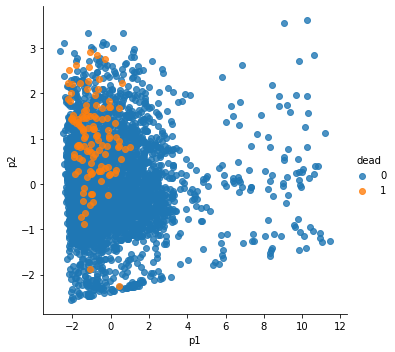

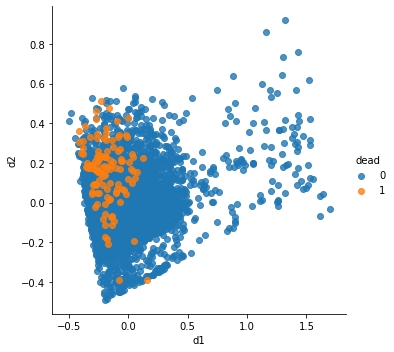

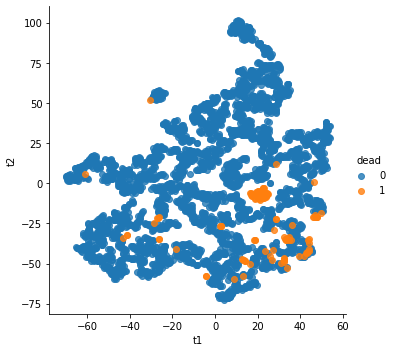

In [29]:
sns.lmplot(data = xp, x = 'p1', y = 'p2', fit_reg = False, hue = 'dead')
sns.lmplot(data = xd, x = 'd1', y = 'd2', fit_reg = False, hue = 'dead')
sns.lmplot(data = xt, x = 't1', y = 't2', fit_reg = False, hue = 'dead')

In [30]:
y.value_counts(True)

0    0.96961
1    0.03039
Name: dead?, dtype: float64

In [31]:
muertos = data[data['dead?'] == 1].copy()
vivos = data[data['dead?'] == 0].copy()

In [32]:
muertos[var_c].describe()

,EDAD,días_con_síntomas,días_desde_ingreso,días_síntomas_hasta_def,días_ingreso_hasta_def
count,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000
mean,58.761049,22.826592,18.983146,8.922846,5.079401
std,17.723973,10.120309,10.003151,5.931863,5.220545
min,0.000000,1.000000,0.000000,-1.000000,-16.000000
25%,48.000000,15.000000,11.000000,5.000000,1.000000
50%,60.000000,22.000000,18.000000,8.000000,4.000000
75%,71.000000,30.000000,26.000000,12.000000,8.000000
max,100.000000,109.000000,107.000000,49.000000,43.000000


In [33]:
vivos[var_c].describe()

,EDAD,días_con_síntomas,días_desde_ingreso,días_síntomas_hasta_def,días_ingreso_hasta_def
count,74335.000000,74335.000000,74335.000000,74335.000000,74335.000000
mean,41.099805,21.937418,18.352983,21.937418,18.352983
std,17.173713,16.646198,16.458407,16.646198,16.458407
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,10.000000,7.000000,10.000000,7.000000
50%,40.000000,18.000000,14.000000,18.000000,14.000000
75%,52.000000,30.000000,26.000000,30.000000,26.000000
max,113.000000,118.000000,118.000000,118.000000,118.000000


In [34]:
data[var_c].describe()

,EDAD,días_con_síntomas,días_desde_ingreso,días_síntomas_hasta_def,días_ingreso_hasta_def
count,77005.000000,77005.000000,77005.000000,77005.000000,77005.000000
mean,41.712175,21.968249,18.374833,21.486163,17.892747
std,17.493956,16.464034,16.277848,16.564328,16.380742
min,0.000000,0.000000,0.000000,-1.000000,-16.000000
25%,30.000000,10.000000,7.000000,10.000000,6.000000
50%,40.000000,18.000000,14.000000,18.000000,14.000000
75%,53.000000,30.000000,26.000000,29.000000,26.000000
max,113.000000,118.000000,118.000000,118.000000,118.000000


In [35]:
x.isnull().sum()/len(x)

EDAD                       0.0
días_con_síntomas          0.0
días_desde_ingreso         0.0
días_síntomas_hasta_def    0.0
días_ingreso_hasta_def     0.0
dtype: float64

In [36]:
for c in x.columns:
    x[c] = x[c].astype(int)

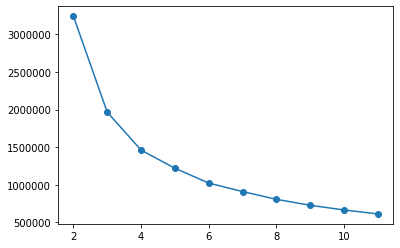

In [37]:
inertia = []
for k in range(2,12):
    km = KMeans(n_clusters = k)
    km.fit(x)
    inertia.append(km.inertia_)
    
plt.plot(range(2,12), inertia, marker = 'o')
plt.show()

In [38]:
k = 4

In [39]:
from sklearn.mixture import GaussianMixture

In [40]:
cluster = GaussianMixture(n_components = k)
cluster.fit(xs)

xc = x.copy()

xp['cl'] = xt['cl'] = xd['cl'] = cluster.predict(xs)

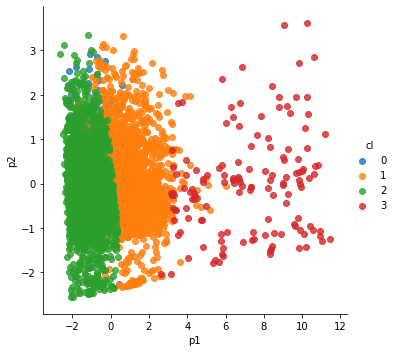

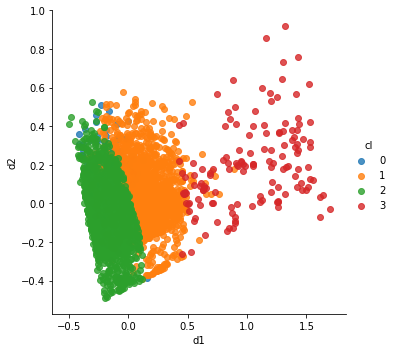

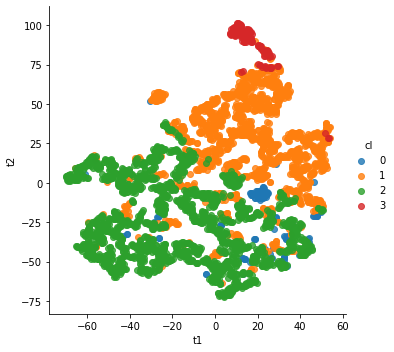

In [41]:
sns.lmplot(data = xp, x = 'p1', y = 'p2', fit_reg = False, hue = 'cl')
sns.lmplot(data = xd, x = 'd1', y = 'd2', fit_reg = False, hue = 'cl')
sns.lmplot(data = xt, x = 't1', y = 't2', fit_reg = False, hue = 'cl')

In [42]:
xc['cl'] = xp['cl']
xc['dead?'] = y

In [43]:
xc.groupby('cl').agg('mean')

,EDAD,días_con_síntomas,días_desde_ingreso,días_síntomas_hasta_def,días_ingreso_hasta_def,dead?
cl,,,,,,
0,60.076923,21.273504,17.769231,8.880342,5.376068,1.0
1,42.321247,31.180662,26.224555,31.180662,26.224555,0.0
2,40.631996,11.752353,9.110451,11.752353,9.110451,0.0
3,30.535211,82.500000,81.098592,82.500000,81.098592,0.0
